### Step 1: Setup and Data Collection

In [1]:
# Install required packages
# pip install streamlit yfinance pandas matplotlib

In [31]:
#Importing the required packages
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Use the Yahoo Finance API to fetch historical stock price data for the selected assets in each portfolio for the period 01/01/2018 to the current date. We'll use the yfinance library to fetch the stock price data. Create a Python script (e.g., data_collection.py) and write the following code:

In [20]:
import yfinance as yf

# List of stock tickers
stocks = ['MSFT', 'AAPL', 'AMZN', 'GOOGL', 'TSLA', 'DELL']

# Define the date range for the historical data
start_date = '2020-01-01'
end_date = '2022-12-31'

# Fetch the data from Yahoo Finance
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Save the data to a CSV file
data.to_csv('stocksData.csv')

[*********************100%***********************]  6 of 6 completed


In [22]:
df = pd.read_csv('stocksData.csv')

In [23]:
#checking the first five records in the dataset
df.head()

,Date,AAPL,AMZN,DELL,GOOGL,MSFT,TSLA
0,2020-01-02,73.347939,94.900497,25.437757,68.433998,155.422073,28.684000
1,2020-01-03,72.634842,93.748497,24.601021,68.075996,153.486755,29.534000
2,2020-01-06,73.213623,95.143997,24.849121,69.890503,153.883514,30.102667
3,2020-01-07,72.869293,95.343002,24.226431,69.755501,152.480408,31.270666
4,2020-01-08,74.041496,94.598503,24.323729,70.251999,154.909225,32.809334


In [24]:
#checking the last five records in the dataset
df.tail()

,Date,AAPL,AMZN,DELL,GOOGL,MSFT,TSLA
751,2022-12-23,131.477127,85.250000,38.472378,89.230003,237.614105,123.150002
752,2022-12-27,129.652435,83.040001,38.757580,87.389999,235.852386,109.099998
753,2022-12-28,125.674019,81.820000,38.118340,86.019997,233.433731,112.709999
754,2022-12-29,129.233658,84.180000,39.160793,88.449997,239.883453,121.820000
755,2022-12-30,129.552719,84.000000,39.554173,88.230003,238.699020,123.180000


In [25]:
# Checking the number rows and records
df.shape

(756, 7)

In [26]:
# Checking the data summary
df.describe()

,AAPL,AMZN,DELL,GOOGL,MSFT,TSLA
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,128.910999,142.455482,39.576925,104.257655,241.644996,206.365502
std,30.726050,27.856019,10.843333,26.472870,47.908622,95.856975
min,54.923038,81.820000,14.044521,52.706501,131.395462,24.081333
25%,113.837992,118.337875,32.157185,78.220125,207.211632,138.270828
50%,134.342522,154.467499,41.493462,104.272999,242.658920,223.651665
75%,149.705540,164.633247,48.300847,126.982876,279.866776,276.565002
max,180.434311,186.570496,58.327915,149.838501,338.335938,409.970001


In [28]:
df_normalized = pd.read_csv('stocksData.csv', index_col='Date', parse_dates=True)

In [29]:
# Calculate daily returns for each stock
returns = df_normalized.pct_change().dropna()

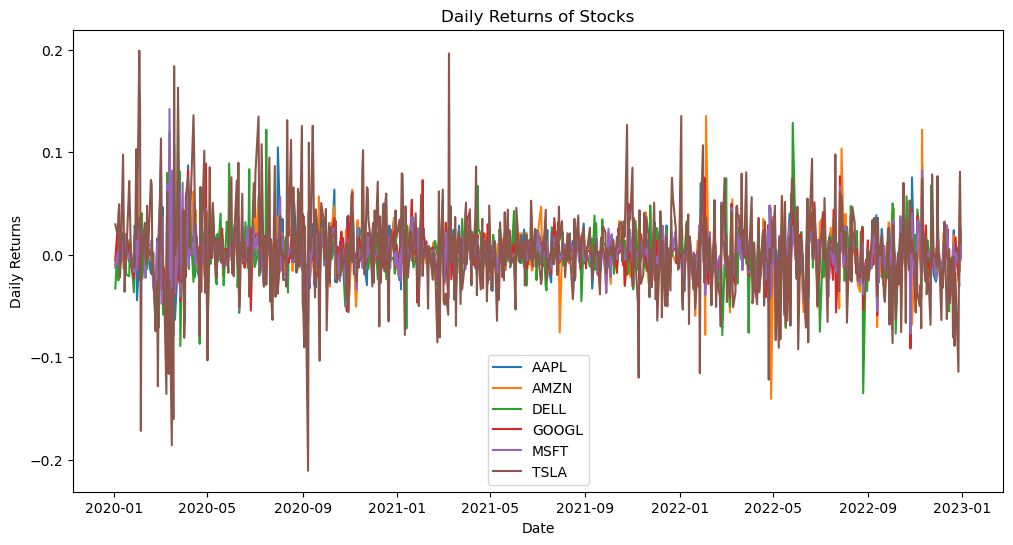

In [32]:
# Plotting the daily returns for each stock
plt.figure(figsize=(12, 6))
for stock in returns.columns:
    plt.plot(returns.index, returns[stock], label=stock)
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns of Stocks')
plt.legend()
plt.show()

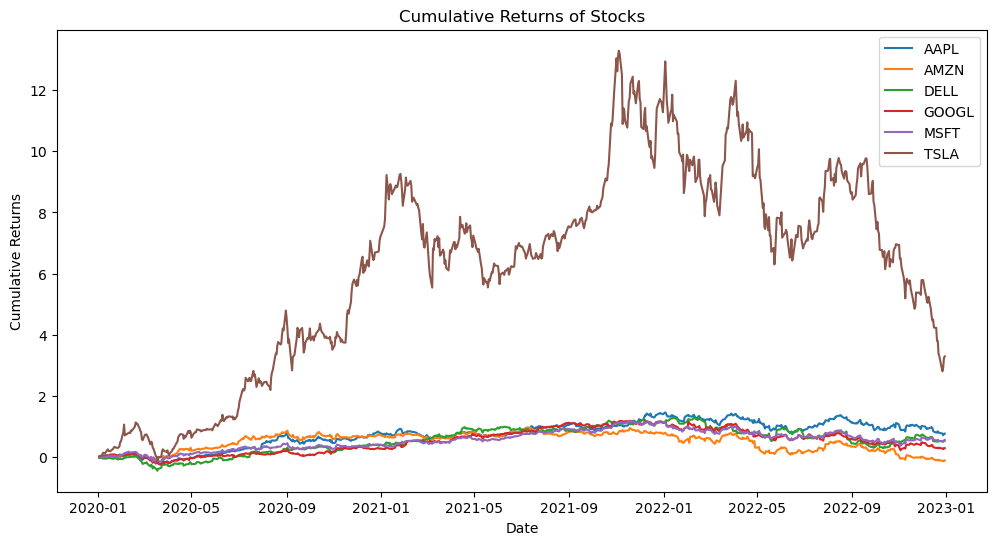

In [33]:
# Calculate and plot the cumulative returns for each stock
cumulative_returns = (returns + 1).cumprod() - 1
plt.figure(figsize=(12, 6))
for stock in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=stock)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of Stocks')
plt.legend()
plt.show()

In [34]:
# Calculate and plot rolling mean and rolling standard deviation for each stock
window_size = 30
rolling_mean = returns.rolling(window=window_size).mean()
rolling_std = returns.rolling(window=window_size).std()

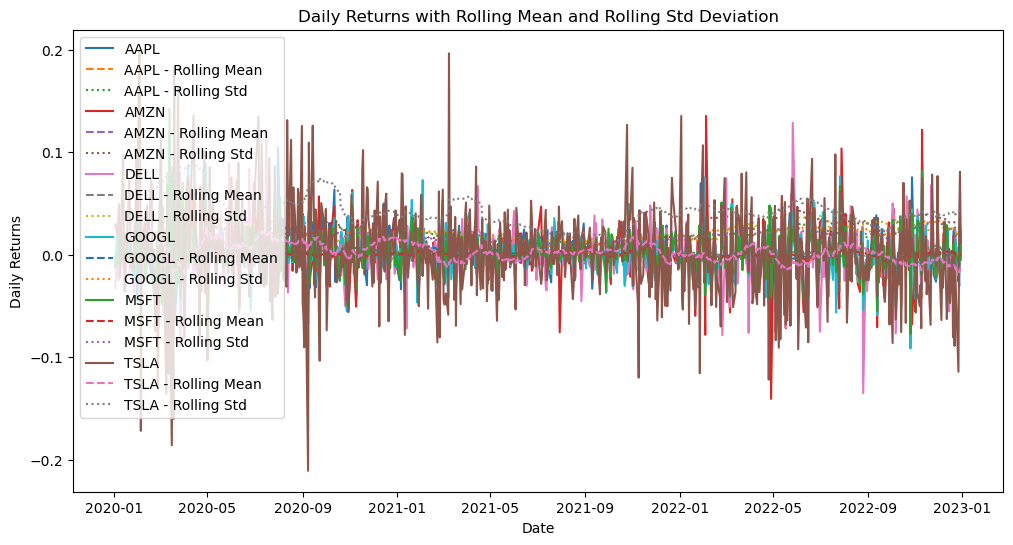

In [35]:
plt.figure(figsize=(12, 6))
for stock in returns.columns:
    plt.plot(returns.index, returns[stock], label=stock)
    plt.plot(rolling_mean.index, rolling_mean[stock], label=f'{stock} - Rolling Mean', linestyle='dashed')
    plt.plot(rolling_std.index, rolling_std[stock], label=f'{stock} - Rolling Std', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns with Rolling Mean and Rolling Std Deviation')
plt.legend()
plt.show()

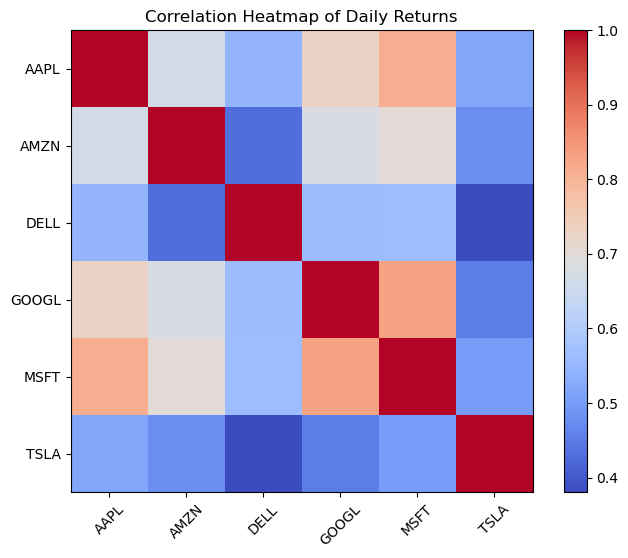

In [36]:
# Correlation heatmap of daily returns
correlation_matrix = returns.corr()
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix)), correlation_matrix.columns)
plt.title('Correlation Heatmap of Daily Returns')
plt.show()

### Portfolio EDA

In [37]:
# Calculate cumulative returns for each stock
cumulative_returns = (returns + 1).cumprod()

In [38]:
# Calculate equal-weighted portfolio returns
portfolio_returns = returns.mean(axis=1)

In [39]:
# Calculate cumulative returns of the equal-weighted portfolio
cumulative_portfolio_returns = (portfolio_returns + 1).cumprod()

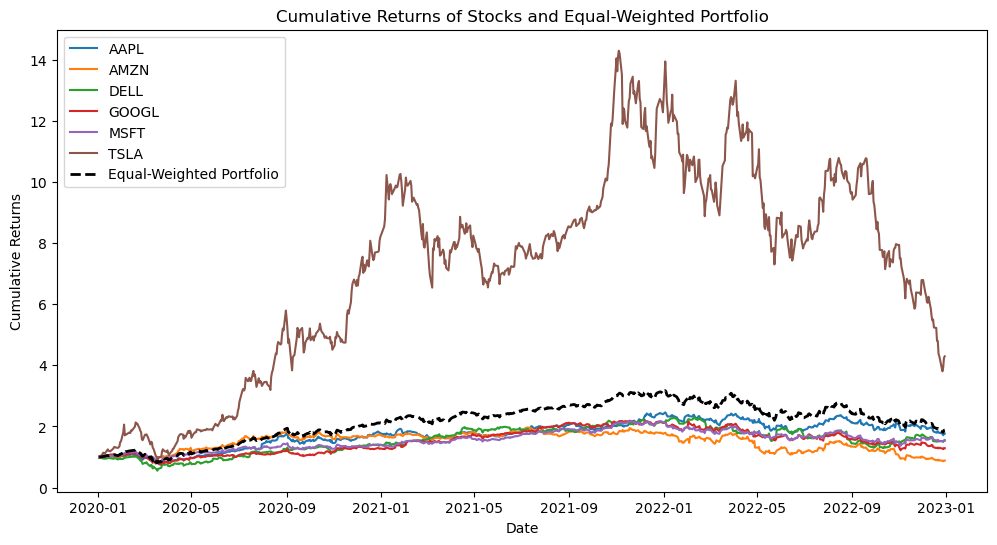

In [40]:
# Plotting the cumulative returns of each stock and the equal-weighted portfolio
plt.figure(figsize=(12, 6))
for stock in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=stock)
plt.plot(cumulative_portfolio_returns.index, cumulative_portfolio_returns, label='Equal-Weighted Portfolio', linestyle='dashed', color='black', linewidth=2.0)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of Stocks and Equal-Weighted Portfolio')
plt.legend()
plt.show()

This graph above produces the following visualizations:

1. **Daily Returns for Each Stock:** Line plots showing the daily returns for each of the six stocks over time.

2. **Cumulative Returns for Each Stock:** Line plots showing the cumulative returns for each stock over time.

3. **Daily Returns with Rolling Mean and Rolling Standard Deviation:** Line plots of the daily returns along with the rolling mean and rolling standard deviation for each stock. The window size for the rolling mean and standard deviation is set to 30 days in this example.

4. **Correlation Heatmap of Daily Returns:** A heatmap showing the correlation between the daily returns of each stock. This helps to identify potential relationships between stock performances.

### Data Preprocessing

In [41]:
# Step 1: Drop rows with missing data
df.dropna(inplace=True)

In [42]:
# Step 2: Removing Duplicates
df.drop_duplicates(inplace=True)

In [43]:
# Step 3: Handling Outliers (Winsorization)
def winsorize(series, lower_percentile=0.05, upper_percentile=0.95):
    lower_bound = series.quantile(lower_percentile)
    upper_bound = series.quantile(upper_percentile)
    series = series.apply(lambda x: min(upper_bound, max(lower_bound, x)))
    return series

# Applying Winsorization to each stock's data
data_winsorized = data.apply(winsorize)

In [44]:
# Step 4: Data Normalization (Min-Max Scaling)
data_normalized = (data_winsorized - data_winsorized.min()) / (data_winsorized.max() - data_winsorized.min())

In [45]:
# Step 5: calculating moving averages
data_rolling_mean = data_normalized.rolling(window=30).mean()

In [46]:
# Step 6: Splitting Data into Training and Testing Sets
train_size = int(0.8 * len(data_normalized))
train_data = data_normalized[:train_size]
test_data = data_normalized[train_size:]

### Dealing with imbalanced data

Dealing with imbalanced data is an important consideration, especially when you have a significant class imbalance in your target variable. In financial modeling, this might occur in scenarios like fraud detection, where fraudulent transactions are relatively rare compared to legitimate ones. The imbalance can lead to biased model performance, as the classifier may be inclined to predict the majority class, ignoring the minority class.

There are several techniques to handle imbalanced data. Here are some common approaches:

**Resampling Techniques:**

- **Oversampling:** Increase the number of instances in the minority class by duplicating existing samples or generating synthetic data points using techniques like SMOTE (Synthetic Minority Over-sampling Technique).
- **Undersampling:** Reduce the number of instances in the majority class by randomly removing data points to balance the class distribution.

**Using Different Evaluation Metrics:**

- Accuracy may not be an appropriate evaluation metric for imbalanced data. Instead, use metrics like precision, recall, F1-score, or area under the Receiver Operating Characteristic (ROC) curve (AUC-ROC) that provide a more comprehensive assessment of model performance.
C
**Class Weights:**

- Assign higher weights to the minority class during model training to give it more importance.

**Ensemble Methods:**

- Ensemble methods like Random Forest or XGBoost can handle imbalanced data better as they combine multiple models, effectively mitigating the bias towards the majority class.

**Anomaly Detection Techniques:**

- Consider using anomaly detection algorithms, which are better suited for detecting rare events in imbalanced data.

In [48]:
# Step 7: Dealing with Imbalanced Data (Using Class Weights)
target_variable = 'PortfolioReturn'  # Name of the new target variable

In [49]:
# Create the Portfolio Return column based on the average daily return of the stocks
data['PortfolioReturn'] = data.mean(axis=1).pct_change().shift(-1)
data.dropna(inplace=True)  # Remove the NaN from the first row due to the shift

In [50]:
# Create the binary target variable: 1 if the Portfolio Return is positive, 0 otherwise
data['PortfolioTarget'] = (data['PortfolioReturn'] > 0).astype(int)

In [51]:
# Count the occurrences of each class in the portfolio target variable
target_counts = data['PortfolioTarget'].value_counts()

In [52]:
# Calculate the class ratios
class_ratio = target_counts[0] / target_counts[1]

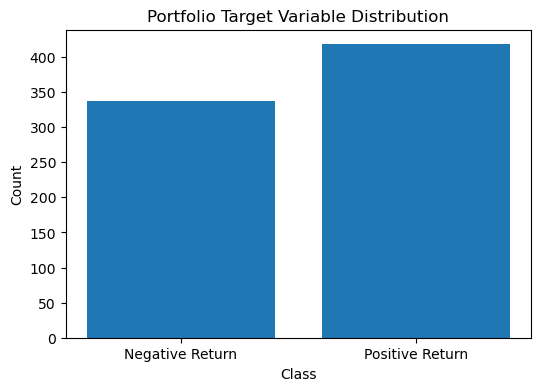

In [53]:
plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Portfolio Target Variable Distribution')
plt.xticks([0, 1], ['Negative Return', 'Positive Return'])
plt.show()

In [54]:
# Check for significant imbalance
if class_ratio > 10:
    print("The data is imbalanced.")
else:
    print("The data is balanced.")

The data is balanced.


In [55]:
# Step 7: Dealing with Imbalanced Data (Using Class Weights)
target_variable = 'PortfolioReturn'  # Select the target variable for which we have class imbalance

In [56]:
# Assuming you have split the data into features (X) and target variable (y)
X_train, X_test = train_data.drop(target_variable, axis=1), test_data.drop(target_variable, axis=1)
y_train, y_test = train_data[target_variable], test_data[target_variable]

KeyError: "['PortfolioReturn'] not found in axis"